In [2]:
# This project is to practice the Datacamp Neural network course and add to my portfolio. 
# The dataset is the UCI blood donation dataset https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center 

In [3]:
# Add to github when done

In [4]:
# Try it with neural nets and logistic regression and compare results. 
# Also find a much larger classification dataset, as neural networks really need more data that n = 750

In [5]:
# PLAN OF ATTACK 
# IMPORT DATA
# EXPLORE, including initial visualizations
# CLEAN including handline outliers, null values, format data as correct dtype, etc
# EXPLORE AGAIN
# MODEL. Check that assumptions are met
## Neural network doing binary classification
# INTERPRET RESULTS. Final visualizations, plain-speech results via slidedeck: https://docs.google.com/presentation/d/1AhuDJJaoszWGqS6jctuePpCjjWkITcbYWKu7Q-LJuD8/edit#slide=id.g21650cc24e6_0_2

Some key findings:

*   24% of donors donate a 2nd+ time
*   Monetary (the number of cc's given) has a much higher variance and range than the others. This is preventing your regular 2.5x std way of removing outliers, as it is removing 300+ entries.  



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
pd.set_option("display.float_format", lambda x: "%.5f" % x) # To get out of scientific notation.  Use pd.reset_option('display.float_format') to reset back to the default

In [11]:
# IMPORT the blood dataset. It's in a .data file, read with .open(). 
# It's stored on Colab's file system. Path is: /transfusion (1).data

blood_data = pd.read_csv("/content/transfusion (1).data")

In [12]:
blood_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [13]:
blood_data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.00000,748.00000,748.00000,748.00000,748.00000
mean,9.50668,5.51471,1378.67647,34.28209,0.23797
std,8.09540,5.83931,1459.82678,24.37671,0.42612
min,0.00000,1.00000,250.00000,2.00000,0.00000
25%,2.75000,2.00000,500.00000,16.00000,0.00000
50%,7.00000,4.00000,1000.00000,28.00000,0.00000
75%,14.00000,7.00000,1750.00000,50.00000,0.00000
max,74.00000,50.00000,12500.00000,98.00000,1.00000


In [14]:
blood_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [15]:
blood_data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [16]:
# rename columns

blood_data.rename(
    columns={'Recency (months)':'Recency'}, inplace=True)
blood_data.rename(
    columns={'Frequency (times)':'Frequency'}, inplace=True)
blood_data.rename(
    columns={'Monetary (c.c. blood)':'Monetary'}, inplace=True)
blood_data.rename(
    columns={'Time (months)':'Time'}, inplace=True)
blood_data.rename(
    columns={'whether he/she donated blood in March 2007':'Target'}, inplace=True)

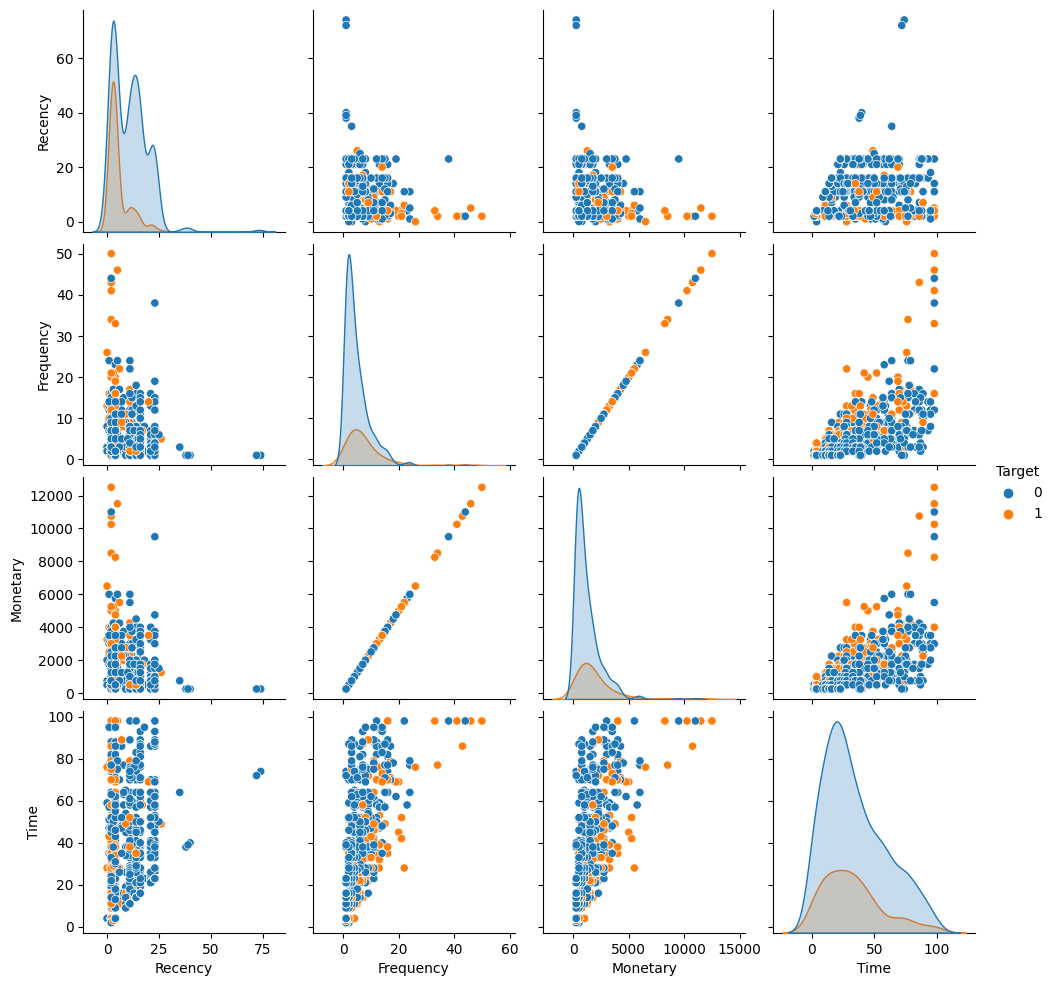

In [17]:
import seaborn as sns

sns.pairplot(blood_data, hue='Target')

In [18]:
blood_data.std()

Recency        8.09540
Frequency      5.83931
Monetary    1459.82678
Time          24.37671
Target         0.42612
dtype: float64

In [19]:
# Check for target incidence. Ensure target incident match between training and test set (or training and validations et, how does that owkr?)
# We have many more didn't donate, than did donate. 
blood_data.Target.value_counts(normalize=True)

0   0.76203
1   0.23797
Name: Target, dtype: float64

In [20]:
# We will want to keep this same structure in the training and test sets. sklearn's stratify parameter can do this

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    blood_data.drop(columns='Target'), # This is creating the training set, by asking for all of blood data aside from dropping the 'Target' columns
    blood_data.Target,
    test_size=0.25,
    random_state=18,
    stratify=blood_data.Target
    )

In [21]:
y_train.value_counts(normalize=True)

0   0.76114
1   0.23886
Name: Target, dtype: float64

In [22]:
y_test.value_counts(normalize=True)

0   0.76471
1   0.23529
Name: Target, dtype: float64

In [23]:
# Time to log normalize
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()
col_to_normalize = 'Monetary'




In [24]:
# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

In [25]:
X_train.std()

Recency        7.81456
Frequency      6.09777
Monetary    1524.44354
Time          24.23913
dtype: float64

In [26]:
X_train_normed.std()

Recency         7.81456
Frequency       6.09777
Time           24.23913
monetary_log    0.93017
dtype: float64

In [27]:
# From here, I suppose remove outliers, and following the rest of the preprocessing steps from Bento
# Remember your training sets are the _normed ones. 

#Then, create your neural network!

In [28]:
# PCA/ feature selectio would be cool here. 'Deep learning' is supposed to do feature selection for you, in a way I don't understand yet.


In [29]:
# I don't know if I need to still use StandardScaler or if I should avoid that, if I should log normlize the other variables, or do nothing? 

In [30]:
# The binary classes are 0 = didn't donate, 1 = donated



In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# The number of neurons, layers, and epochs can be determined empirically (i.e. try what works), with some important guidelines to follow. 

model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='sigmoid')) # I get why input shape is 4, but why dense layer of 1? How to know how many hidden layers to add?
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train_normed, y_train, epochs = 50)


Epoch 1/50
18/18 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.7611
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.7611
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7611
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7611
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7611
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7611
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7611
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7611
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7611
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7611
Epoch 11/50
18/18 [

In [33]:
# Practicing with callback

h_callback = model.fit(X_train_normed, y_train, epochs = 50,
                       validation_data = (X_test_normed, y_test))

Epoch 1/50
18/18 [==============================] - 0s 18ms/step - loss: 0.5498 - accuracy: 0.7611 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5498 - accuracy: 0.7611 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5499 - accuracy: 0.7611 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5499 - accuracy: 0.7611 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5498 - accuracy: 0.7611 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5499 - accuracy: 0.7611 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5499 - accuracy: 0.7611 - val_loss: 0.5455 - val_accuracy: 0.7647
Epoch 8/50
18/18 [=

In [36]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

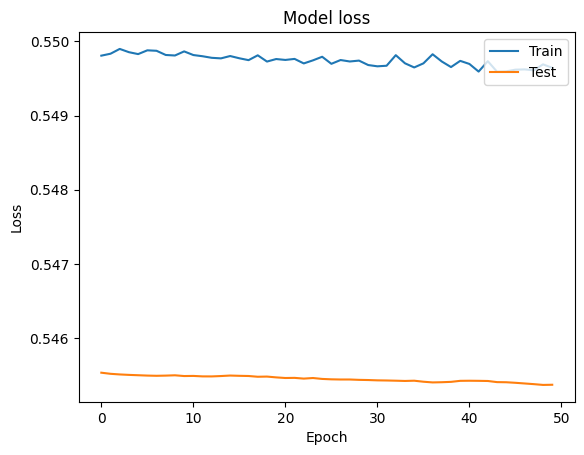

In [37]:
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

In [39]:
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

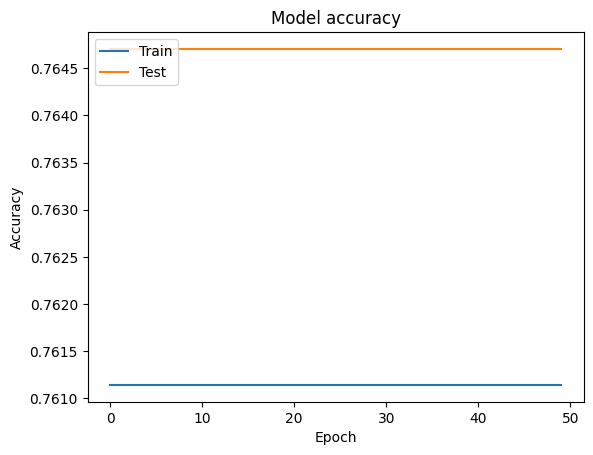

In [40]:
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])